## Algerian Forest Fires EDA

#### Life cycle of Machine learning Project

    1.Understanding the Problem Statement 
    2.Data Collection 
    3.Exploratory data analysis 
    4.Data Cleaning 
    5.Data Pre-Processing 
    6.Model Training
    7.Choose best model

#### Data Collection.
The Dataset is collected from UIC machine learning repository Dataset link : https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.

Reference:
https://www.kaggle.com/code/psvishnu/forestfire-impact-prediction-stats-and-ml

### Import Data and Required Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Importing the dataset
Since data is in form of an csv file we have to use “pandas.read_csv” to load the data and store it in data frame as df.we are setting header = 1 means row 1 ,row 0 it will ignore

In [2]:
df = pd.read_csv("data/Algerian_forest_fires_dataset_UPDATE.csv",header=1)

### lets look at datset of first 5 rows

In [3]:
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

In [4]:
df.iloc[122]

day            Sidi-Bel Abbes Region Dataset
month                                    NaN
year                                     NaN
Temperature                              NaN
 RH                                      NaN
 Ws                                      NaN
Rain                                     NaN
FFMC                                     NaN
DMC                                      NaN
DC                                       NaN
ISI                                      NaN
BUI                                      NaN
FWI                                      NaN
Classes                                  NaN
Name: 122, dtype: object

### Shape of the data

In [5]:
df.shape

(246, 14)

#### We have to clean dataset

In [6]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [7]:
df[df.isna().any(axis=1)]

day month  year Temperature   RH   Ws Rain   \
122  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN   NaN   
167                             14    07  2012          37   37   18   0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes    
122   NaN   NaN     NaN   NaN   NaN      NaN       NaN  
167  88.9  12.9  14.6 9  12.5  10.4  fire          NaN

In [8]:
df[df["Temperature"] =="Temperature"]

day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI  \
123  day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI   

     FWI  Classes    
123  FWI  Classes

In [9]:
df["Temperature"].unique()

array(['29', '26', '25', '27', '31', '33', '30', '28', '32', '34', '35',
       '36', '37', '22', '24', nan, 'Temperature', '38', '39', '40', '42'],
      dtype=object)

#### Drop row and reset index

In [10]:
df.drop([122,123], inplace=True)

In [11]:
df.shape

(244, 14)

In [12]:
# Reset the index beacaue dropped row 122, 123
df.reset_index(inplace=True)

In [13]:
df.head()

index day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  \
0      0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4   
1      1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9   
2      2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3      3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7   
4      4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9   

   FWI    Classes    
0  0.5  not fire     
1  0.4  not fire     
2  0.1  not fire     
3    0  not fire     
4  0.5  not fire

In [14]:
### Now droping index column
df.drop("index", axis=1,inplace=True)

In [15]:
df

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
239  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
240  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
241  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
242  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
243  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
0    0.5   not fire     
1    0.4   not fire     
2    0.1   not fire     
3      0   not fire     
4    0.5   not fire     
..   ...           ...  
239  6.5       fire     
240    0   not fire     
241  0.2   not fire     
242  0.7   not fire     
243  0.5  not fire      

[244 rows x 14 columns]

Observation :- 122 row it contains the nan values see the 123 row it contains the categorical values we have to remove the 122 and 123 rows because it is different from the your data

### Adding new column region (rows 1 = Bejaia Region and 0 = Sidi Bel-abbes Region)

In [16]:
df["Region"] = 1
for i in range(len(df)):
    if i >= 122:
        df["Region"][i] = 0


In [17]:
df

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
239  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
240  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
241  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
242  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
243  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    Region  
0    0.5   not fire          1  
1    0.4   not fire          1  
2    0.1   not fire          1  
3      0   not fire          1  
4    0.5   not fire          1  
..   ...           ...     ...  
239  6.5       fire          0  
240    0   not fire          0  
241  0.2   not fire          0  
242  0.7   not fire          0  
243  0.5  not fire           0  

[244 rows x 15 columns]

Obsevation: 244 Rows and 15 Columns

### Check regions value counts

In [18]:
df["Region"].value_counts()

1    122
0    122
Name: Region, dtype: int64

Observation: Value counts for Region colums
1-122
0-122

In [19]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

Observation: Column name have extra space

In [20]:
df.columns = [i.strip() for i in df.columns]

In [21]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

#### Categorial Column

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


In [23]:
df["Classes"].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

Observation: Classes column vales have extra space

In [24]:
df["Classes"] = df["Classes"].str.strip()

In [25]:
df["Classes"].unique()

array(['not fire', 'fire', nan], dtype=object)

Observation: Got nan value, identify it and set correct

In [26]:
df[df.isna().any(axis=1)]

day month  year Temperature  RH  Ws Rain  FFMC   DMC      DC   ISI   BUI  \
165  14    07  2012          37  37  18  0.2  88.9  12.9  14.6 9  12.5  10.4   

         FWI Classes  Region  
165  fire        NaN       0

observation: Some value mismatch in position, we have reset it

In [27]:
df.at[165,"DC"] = 14.6
df.at[165,"ISI"] = 9
df.at[165,"BUI"] = 12.5
df.at[165,"FWI"] = 10.4
df.at[165,"Classes"] = "fire"

In [28]:
df.iloc[165]

day              14
month            07
year           2012
Temperature      37
RH               37
Ws               18
Rain            0.2
FFMC           88.9
DMC            12.9
DC             14.6
ISI               9
BUI            12.5
FWI            10.4
Classes        fire
Region            0
Name: 165, dtype: object

#### Check the Null values

In [29]:
df.isnull().sum().sum()

0

Observation: No Null Values

### Check DataType for each column

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


Observation: All columns apart from "Region" column are object type

##### Convert column datatype to int and float

In [31]:
df = df.astype({"day":"int32", "month":"int32", "year":"int32", "Temperature":"int", "RH":"int", "Ws":"int", "Rain":"float", "FFMC":"float", "DMC":"float", "DC":"float"
               ,"ISI":"float", "BUI":"float", "FWI":"float"})

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(7), int32(6), int64(1), object(1)
memory usage: 23.0+ KB


Observation: Successfully convert column datatype

#### Top 5 rows

In [33]:
df.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI   Classes  Region  
0  0.5  not fire       1  
1  0.4  not fire       1  
2  0.1  not fire       1  
3  0.0  not fire       1  
4  0.5  not fire       1

#### Shape

In [34]:
df.shape

(244, 15)

#### Summary of dataset
Displayed statistics summary of dataset

In [35]:
df.describe()

day       month    year  Temperature          RH          Ws  \
count  244.000000  244.000000   244.0   244.000000  244.000000  244.000000   
mean    15.754098    7.500000  2012.0    32.172131   61.938525   15.504098   
std      8.825059    1.112961     0.0     3.633843   14.884200    2.810178   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.000000   14.000000   
50%     16.000000    7.500000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.250000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000   
mean     0.760656   77.887705   14.673361   49.288115    4.759836   16.673361   
std      1.999406   14.337571   12.368039   47.619662    4.154628   14.201648   
min      0.000000   28.600000    0.700000    6.900000    0.000000    1.100000   
25%      0.000000   72.075000    5.800000   13.275000    1.400000    6.000000   
50%      0.000000   83.500000   11.300000   33.100000    3.500000   12.450000   
75%      0.500000   88.300000   20.750000   68.150000    7.300000   22.525000   
max     16.800000   96.000000   65.900000  220.400000   19.000000   68.000000   

              FWI      Region  
count  244.000000  244.000000  
mean     7.049180    0.500000  
std      7.428366    0.501028  
min      0.000000    0.000000  
25%      0.700000    0.000000  
50%      4.450000    0.500000  
75%     11.375000    1.000000  
max     31.100000    1.000000

Transposing using T

In [36]:
df.describe().T

count         mean        std     min       25%      50%  \
day          244.0    15.754098   8.825059     1.0     8.000    16.00   
month        244.0     7.500000   1.112961     6.0     7.000     7.50   
year         244.0  2012.000000   0.000000  2012.0  2012.000  2012.00   
Temperature  244.0    32.172131   3.633843    22.0    30.000    32.00   
RH           244.0    61.938525  14.884200    21.0    52.000    63.00   
Ws           244.0    15.504098   2.810178     6.0    14.000    15.00   
Rain         244.0     0.760656   1.999406     0.0     0.000     0.00   
FFMC         244.0    77.887705  14.337571    28.6    72.075    83.50   
DMC          244.0    14.673361  12.368039     0.7     5.800    11.30   
DC           244.0    49.288115  47.619662     6.9    13.275    33.10   
ISI          244.0     4.759836   4.154628     0.0     1.400     3.50   
BUI          244.0    16.673361  14.201648     1.1     6.000    12.45   
FWI          244.0     7.049180   7.428366     0.0     0.700     4.45   
Region       244.0     0.500000   0.501028     0.0     0.000     0.50   

                  75%     max  
day            23.000    31.0  
month           8.000     9.0  
year         2012.000  2012.0  
Temperature    35.000    42.0  
RH             73.250    90.0  
Ws             17.000    29.0  
Rain            0.500    16.8  
FFMC           88.300    96.0  
DMC            20.750    65.9  
DC             68.150   220.4  
ISI             7.300    19.0  
BUI            22.525    68.0  
FWI            11.375    31.1  
Region          1.000     1.0

### Datatype check

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(7), int32(6), int64(1), object(1)
memory usage: 23.0+ KB


#### Separating numerical and categorial cloumn

In [38]:
df["Classes"].dtype

dtype('O')

In [39]:
cat_col = [col for col in df.columns if df[col].dtype == "O"]

In [40]:
cat_col

['Classes']

In [41]:
num_col = [col for col in df.columns if df[col].dtype != "O"]
num_col

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Region']

In [42]:
len(num_col)

14

Observation: We have 14 numerical columns and 1 categorial column

## Univariate Analysis
The term univariate analysis refers to the analysis of one variable. You can remember this because the prefix “uni” means “one.”

The purpose of univariate analysis is to understand the distribution of values for a single variable

In [43]:
## Numerical feature analysis

#### Scatter Plot

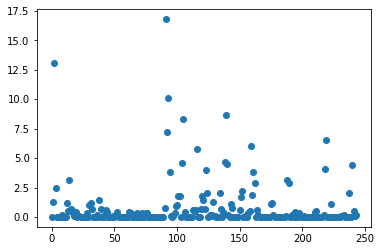

In [44]:
plt.scatter(df.index,df["Rain"])

Onbservation: Rain speed is high at 17.5 

<AxesSubplot:ylabel='Rain'>

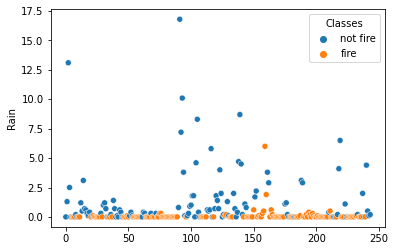

In [45]:
sns.scatterplot(x=df.index,y=df["Rain"], hue=df["Classes"])

observation: When have moree rain their have less fire, when have less rain their is more fire

<AxesSubplot:ylabel='Temperature'>

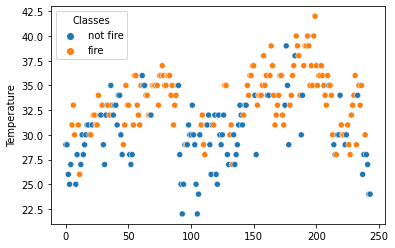

In [46]:
sns.scatterplot(x=df.index, y=df["Temperature"], hue=df["Classes"])

Observation: When temperature is high their is more fire, when temperature is low their is low fire/not fire

In [47]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

<AxesSubplot:ylabel='Ws'>

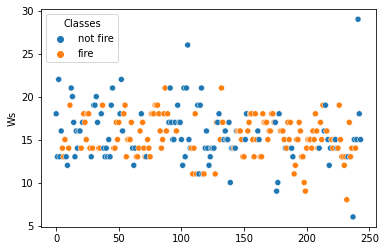

In [48]:
sns.scatterplot(x=df.index, y=df["Ws"], hue=df["Classes"])

observation: When wind speed is high then not fire, when wind speed is low/medium then low fire / not fire

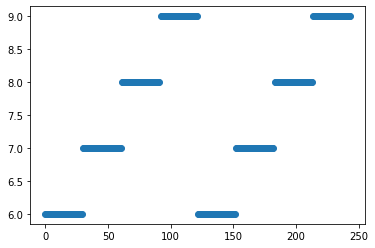

In [49]:
plt.scatter(df.index,df["month"])

Observation: month is increasing from 6 to 9

In [50]:
df["month"].unique()

array([6, 7, 8, 9])

<AxesSubplot:ylabel='FFMC'>

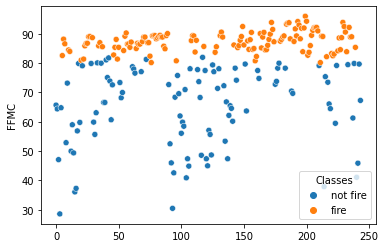

In [51]:
sns.scatterplot(x=df.index,y=df["FFMC"], hue=df["Classes"])

Observation: When Fine Fuel Moisture Code (FFMC) index is < 80 then no fire, when Fine Fuel Moisture Code (FFMC) index is > 90 then fire

<AxesSubplot:ylabel='DMC'>

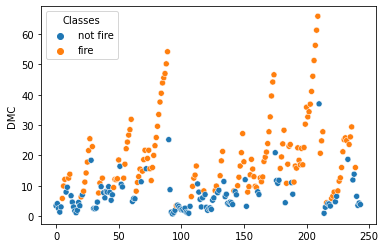

In [52]:
sns.scatterplot(x=df.index, y=df["DMC"], hue=df["Classes"])

Observation: When Duff Moisture Code (DMC) is less than 10 then no fire, when Duff Moisture Code (DMC) is more than 15 then fire

<AxesSubplot:ylabel='DC'>

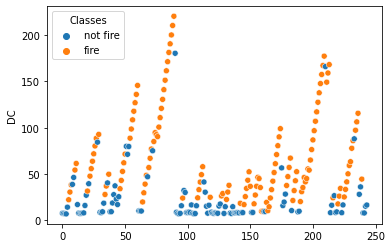

In [53]:
sns.scatterplot(x=df.index, y = df["DC"], hue=df["Classes"])

Observation: When Drought Code (DC) is 0 then no fire, when Drought Code (DC) is more than 1 then fire

<AxesSubplot:ylabel='RH'>

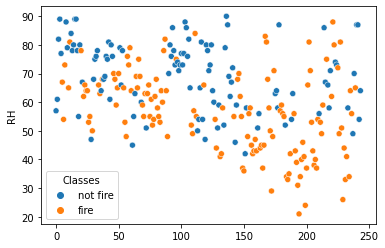

In [54]:
sns.scatterplot(x=df.index, y=df["RH"], hue=df["Classes"])

Observation: When Relative Humidity(RH) is more then no fire, when Relative Humidity(RH) is less than 80 the fire

### Histogram

A histogram is one of the most frequently used data visualization techniques in machine learning. It represents the distribution of a continuous variable over a given interval or period of time. Histograms plot the data by dividing it into intervals called ‘bins’. It is used to inspect the underlying frequency distribution (eg. Normal distribution), outliers, skewness, etc.

A histogram is a type of bar graph that shows how many of something occurred, also called the frequency. A histogram looks like a bar graph except that the bars are adjacent, that is, there's no space between them. ... This histogram also shows the curve of the normal distribution.

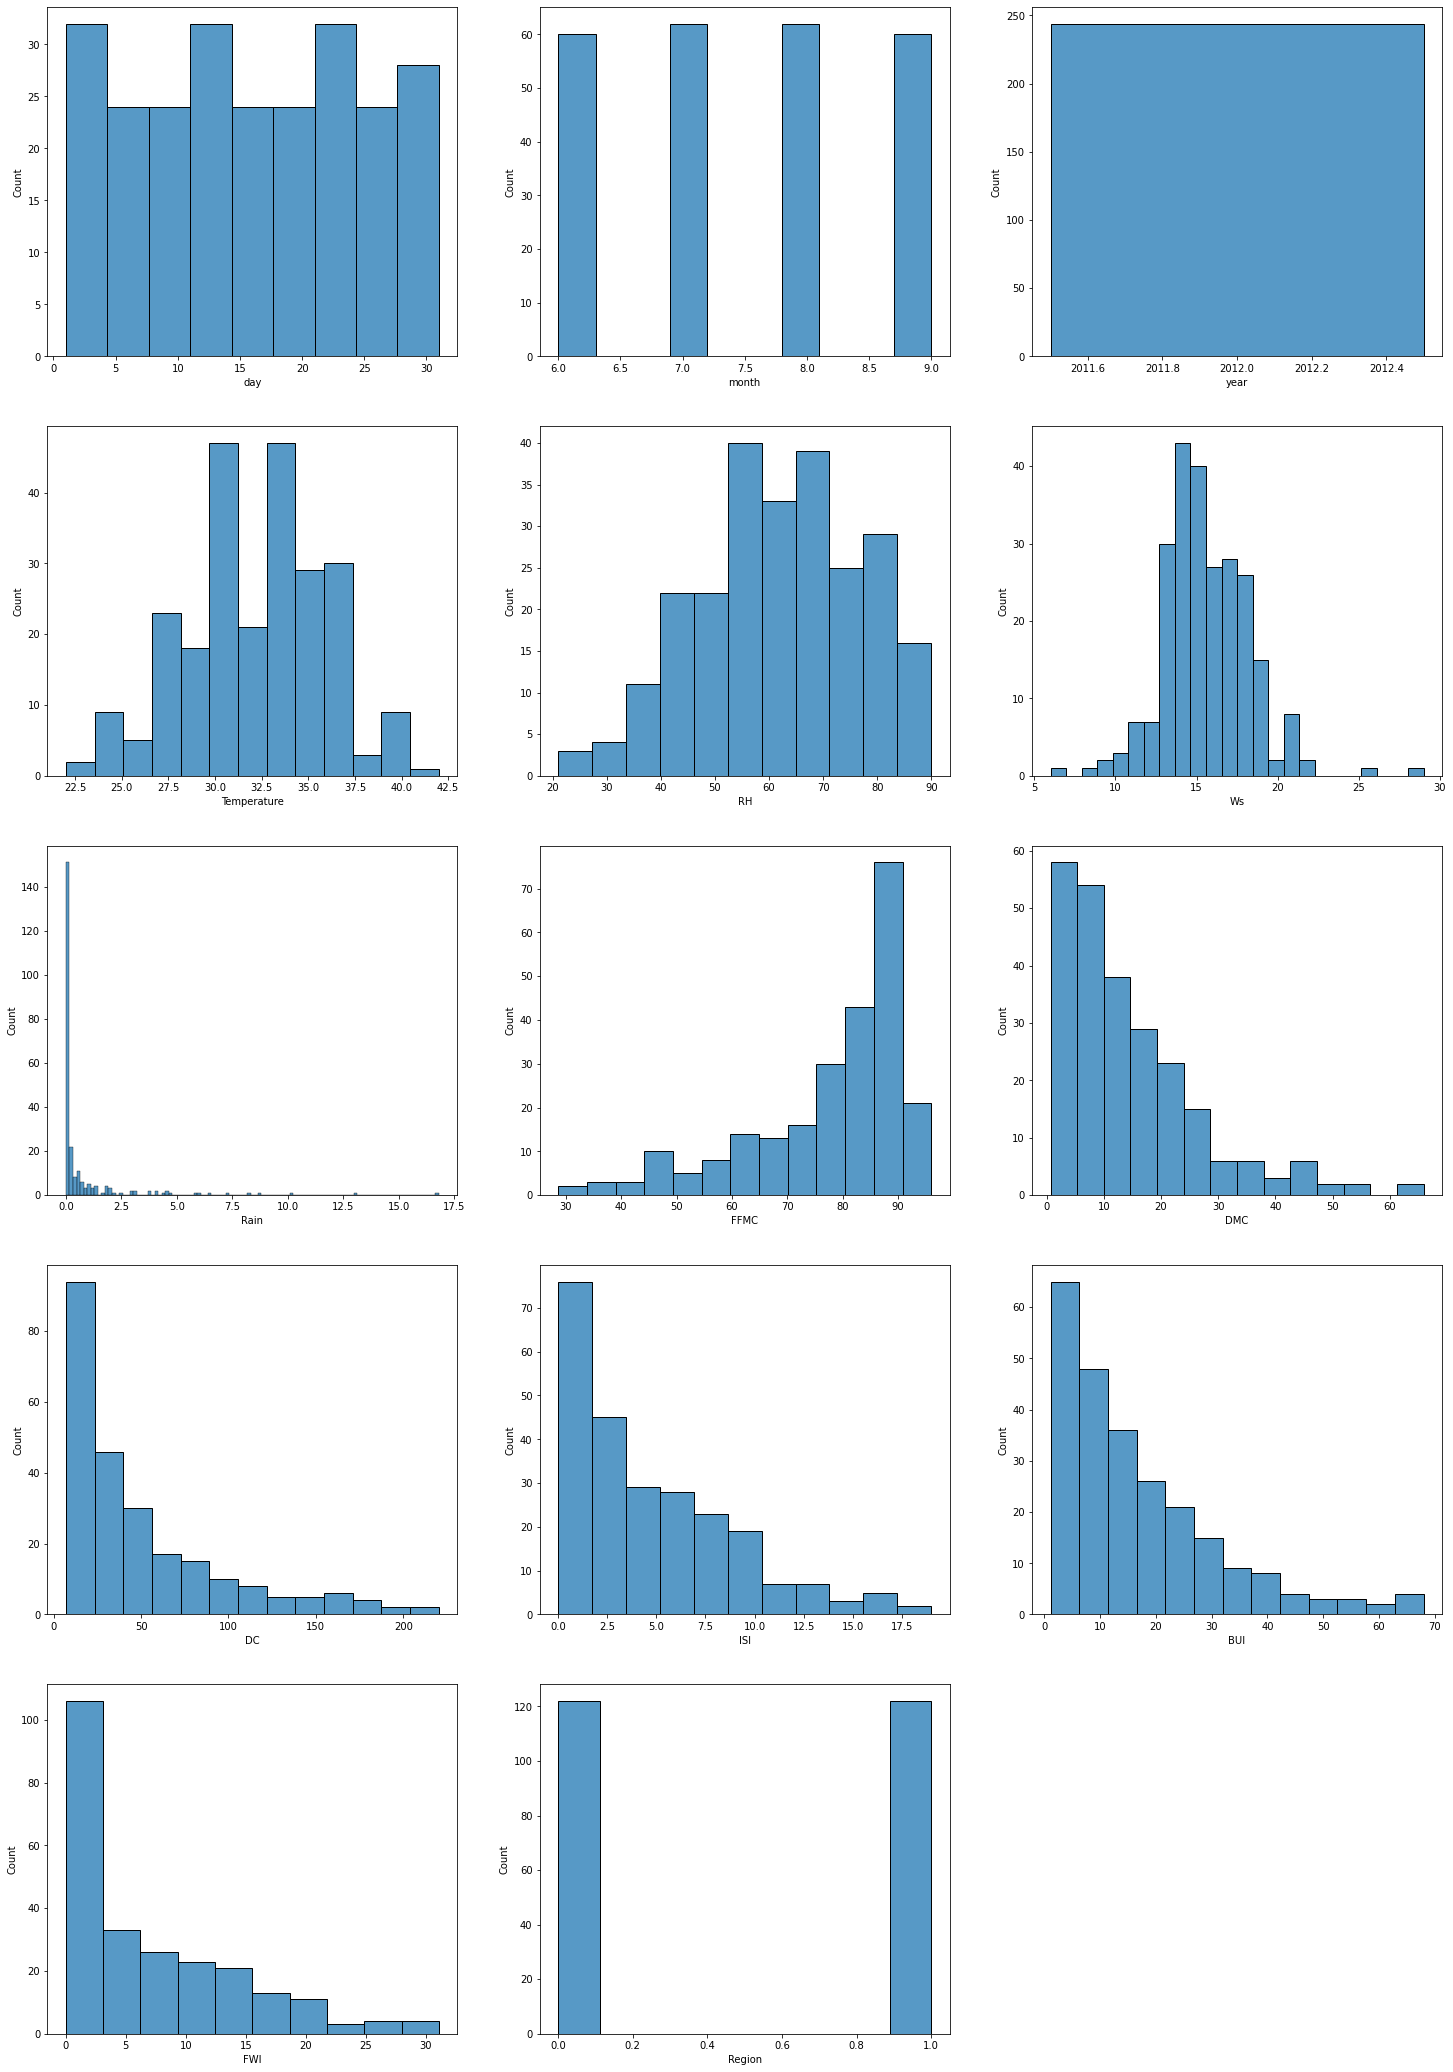

In [55]:
plt.figure(figsize=(25,45))
plt.title('Distribution of the variable x')  
for i in range(0,len(num_col)):
    plt.subplot(6,3,i+1)
    sns.histplot(x=num_col[i],data=df)
    plt.xlabel(num_col[i])
    # plt.show() 

### Density Plots
First, what is a density plot? A density plot is a smoothed, continuous version of a histogram estimated from the data. The most common form of estimation is known as kernel density estimation. In this method, a continuous curve (the kernel) is drawn at every individual data point and all of these curves are then added together to make a single smooth density estimation. The kernel most often used is a Gaussian (which produces a Gaussian bell curve at each data point). 

#### Histogram plot with KDE
Display a histogram with a KDE curve as below

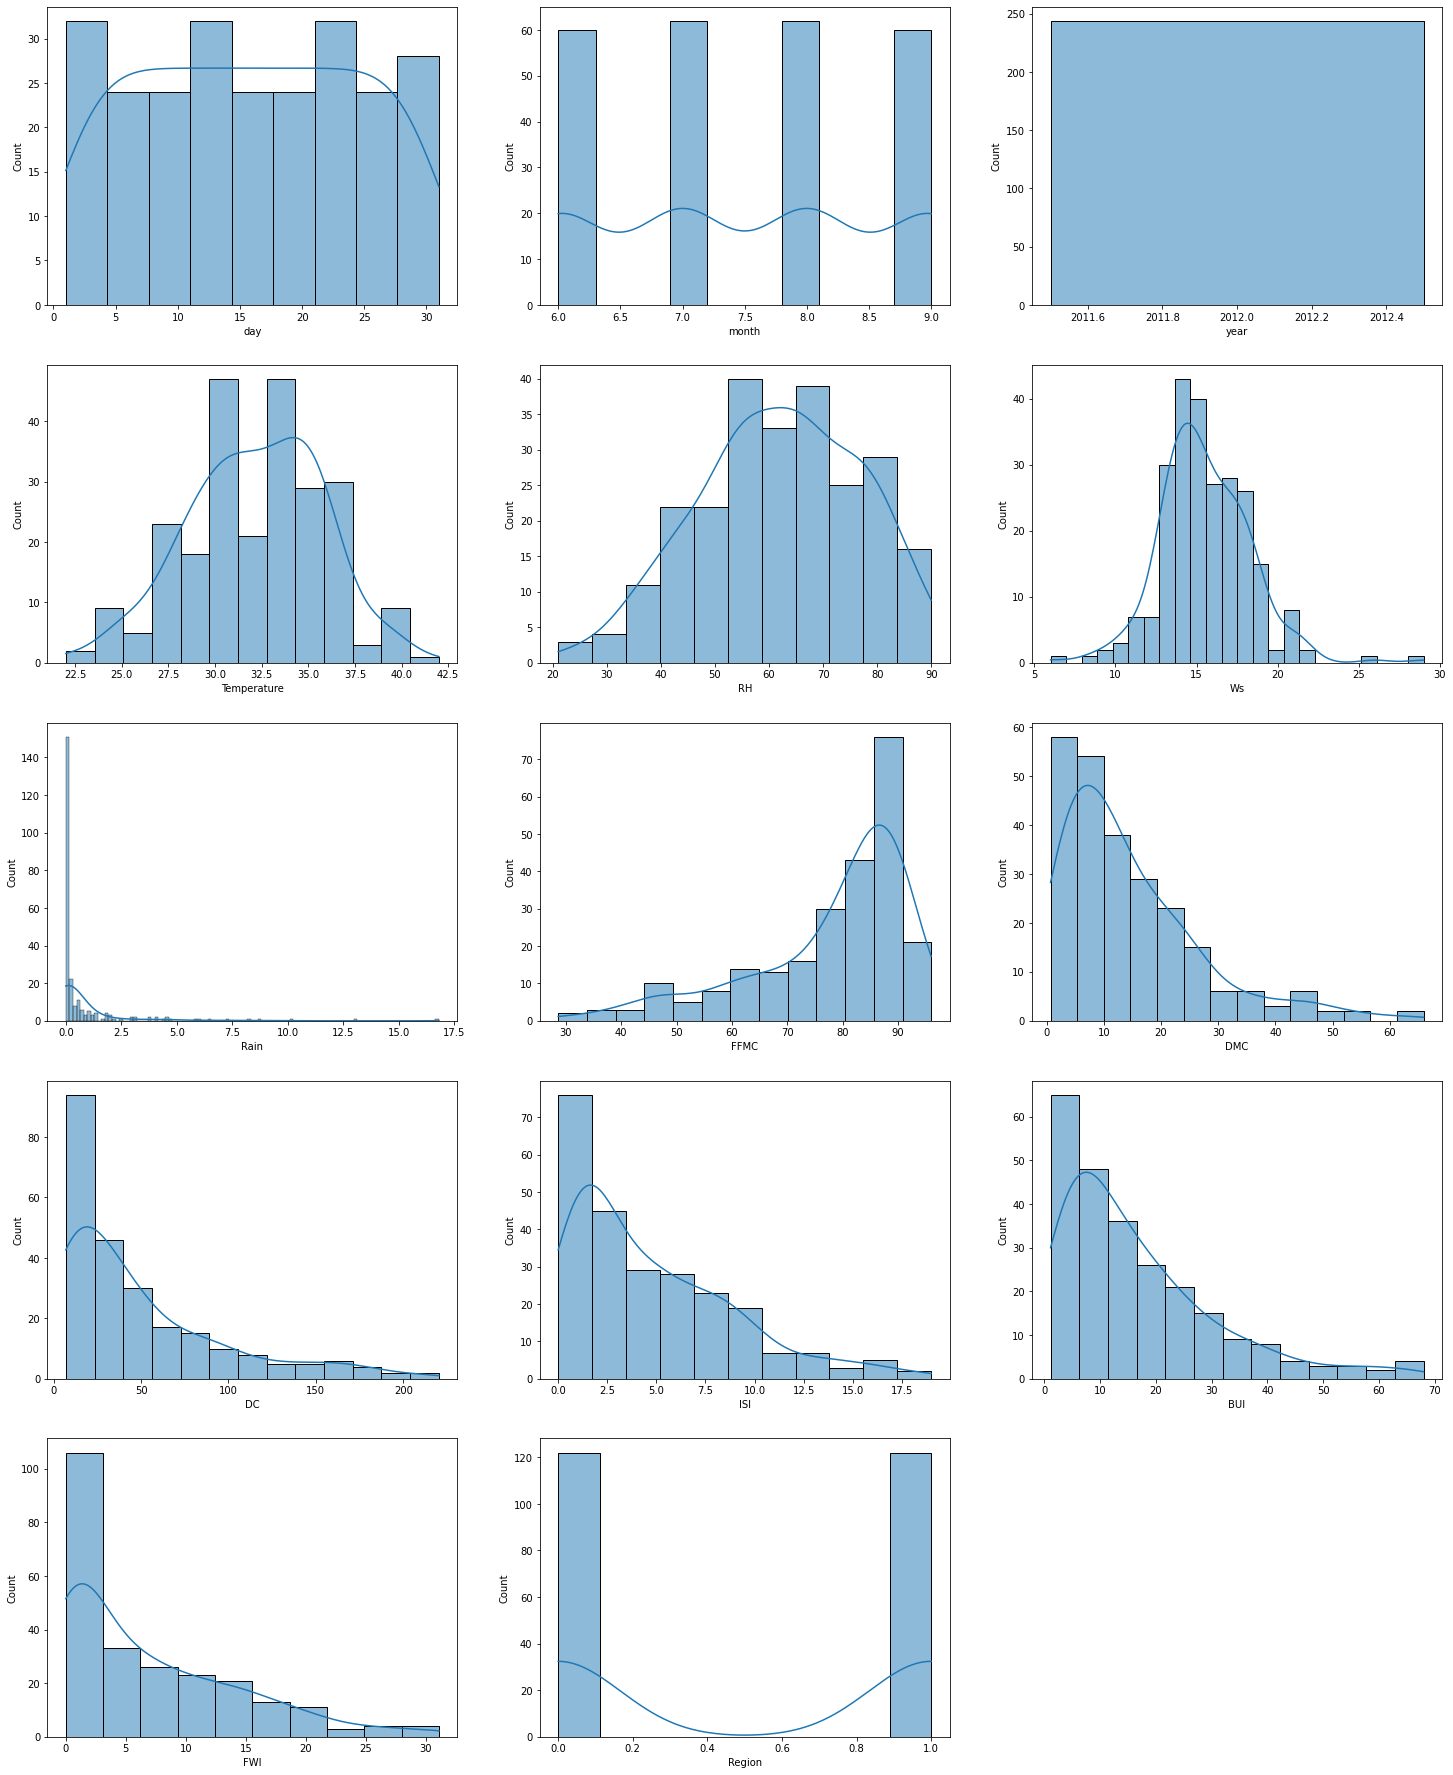

In [56]:
plt.figure(figsize=(25,45))
for i in range(0, len(num_col)):
    plt.subplot(7,3,i+1)
    sns.histplot(x=num_col[i], data=df, kde=True)
    plt.xlabel(num_col[i])

Observation: 

    Normal Distribution: day, Ws, Month
    Left Skew: FFMC, DMC, Rain
    Right Skew: DC, ISI, BUI, FWI

### KDE

Kernel density estimation is a non-parametric model also know as KDE, it’s a technique that lets you create a smooth curve given a set of data. KDE basically centers a kernel function at each data point and smooths it to get a destiny estimate.

A kernel density estimation (KDE) is a way to estimate the probability density function (PDF) of the random variable that “underlies” our sample. KDE is a means of data smoothing.

To understand kernel estimators we first need to understand histograms whose disadvantages provides the motivation for kernel estimators. When we construct a histogram, we need to consider the width of the bins ( equal sub-intervals in which the whole data interval is divided) and the end points of the bins (where each of the bins start). As a result, the problems with histograms are that they are not smooth, depend on the width of the bins and the end points of the bins. We can alleviate these problem by using kernel density estimators.

To remove the dependence on the end points of the bins, kernel estimators centre a kernel function at each data point. And if we use a smooth kernel function for our building block, then we will have a smooth density estimate. This way we have eliminated two of the problems associated with histograms. The problem of bin-width still remains which is tackled using a technique discussed later on.

https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/AV0405/MISHRA/kde.html

https://medium.com/analytics-vidhya/ml04-kernel-density-estimation-ee29a1578d0c

https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

http://faculty.washington.edu/yenchic/18W_425/Lec6_hist_KDE.pdf

##### KDE plot on rain

<AxesSubplot:xlabel='Rain', ylabel='Density'>

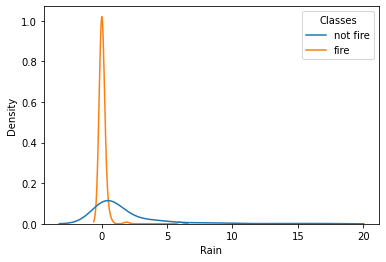

In [57]:
sns.kdeplot(x=df["Rain"], data=df, hue="Classes")

Observation: Fire Density is high on rain plot, not fire desnoty is low

#### KDE plot on temperature

sns.distplot(x=df["Temperature"], kde=True)

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

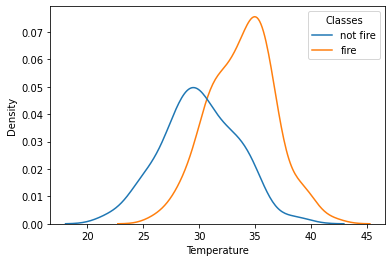

In [58]:
sns.kdeplot(x=df["Temperature"], data=df, hue="Classes")

Observation: Temperature fire density is high, temperature not fire density is low

#### KDE Plot on FFMC

<AxesSubplot:xlabel='FFMC', ylabel='Density'>

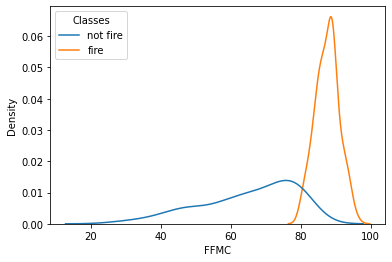

In [59]:
sns.kdeplot(x=df["FFMC"], data=df, hue="Classes")

Observation: When FFMC is high then fire density is high, When FFMC is low then not fire density is low

#### KDE Plot on DMC

<AxesSubplot:xlabel='DMC', ylabel='Density'>

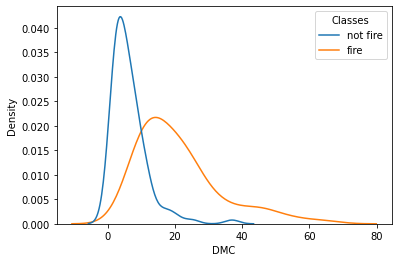

In [60]:
sns.kdeplot(x=df["DMC"], data=df, hue="Classes")

Observation: When DMC is high then fire density is low, When DMC is low then not fire density is high

#### KDE Plot on RH

<AxesSubplot:xlabel='RH', ylabel='Density'>

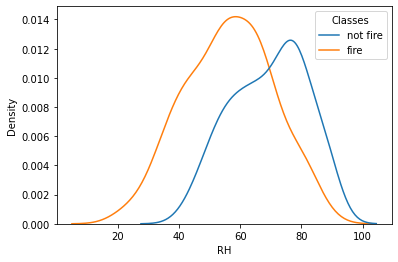

In [61]:
sns.kdeplot(x=df["RH"], data=df, hue="Classes")

Observation: 1.when RH is high then not fire is also high 2.when rh is low then fire is also low as compared to not fire

#### KDE Plot on WS

<AxesSubplot:xlabel='Ws', ylabel='Density'>

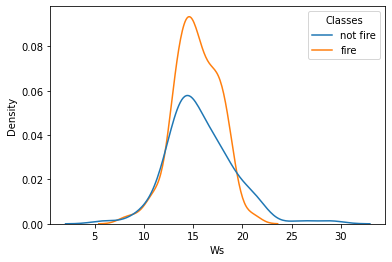

In [62]:
sns.kdeplot(x=df["Ws"], data=df, hue="Classes")

Observation: When Ws is medium then fire is high, when Ws is high then not fire

#### KDE Plot on Region

<AxesSubplot:xlabel='Region', ylabel='Density'>

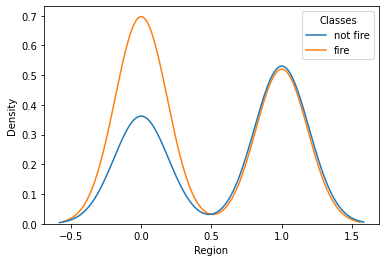

In [63]:
sns.kdeplot(x=df["Region"], data=df, hue="Classes")

Observation: When Regoin is 0 then Fire is high, when Region is 1 then both fire and not fire

#### KDE Plot on month

<AxesSubplot:xlabel='month', ylabel='Density'>

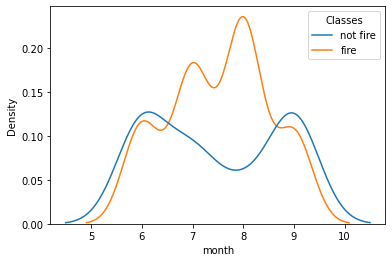

In [64]:
sns.kdeplot(x=df["month"],data=df,hue="Classes")

## Box Plot

Boxplots are helpful charts that clearly illustrate the distribution in a dataset, by visualizing the range, distribution, and extreme values. A boxplot is a helpful data visualization that illustrates five different summary statistics for your data. It helps you understand the data in a much clearer way than just seeing a single summary statistic.

1. “minimum”
2. 1st Quartile (25th percentile)
3. median (2nd Quartile/ 50th Percentile)
4. 3rd Quartile (75th percentile)
5. “maximum”

Boxplots can be used to:

1. Identify outliers or anomalous data points
2. To determine if our data is skewed
3. To understand the spread/range of the data

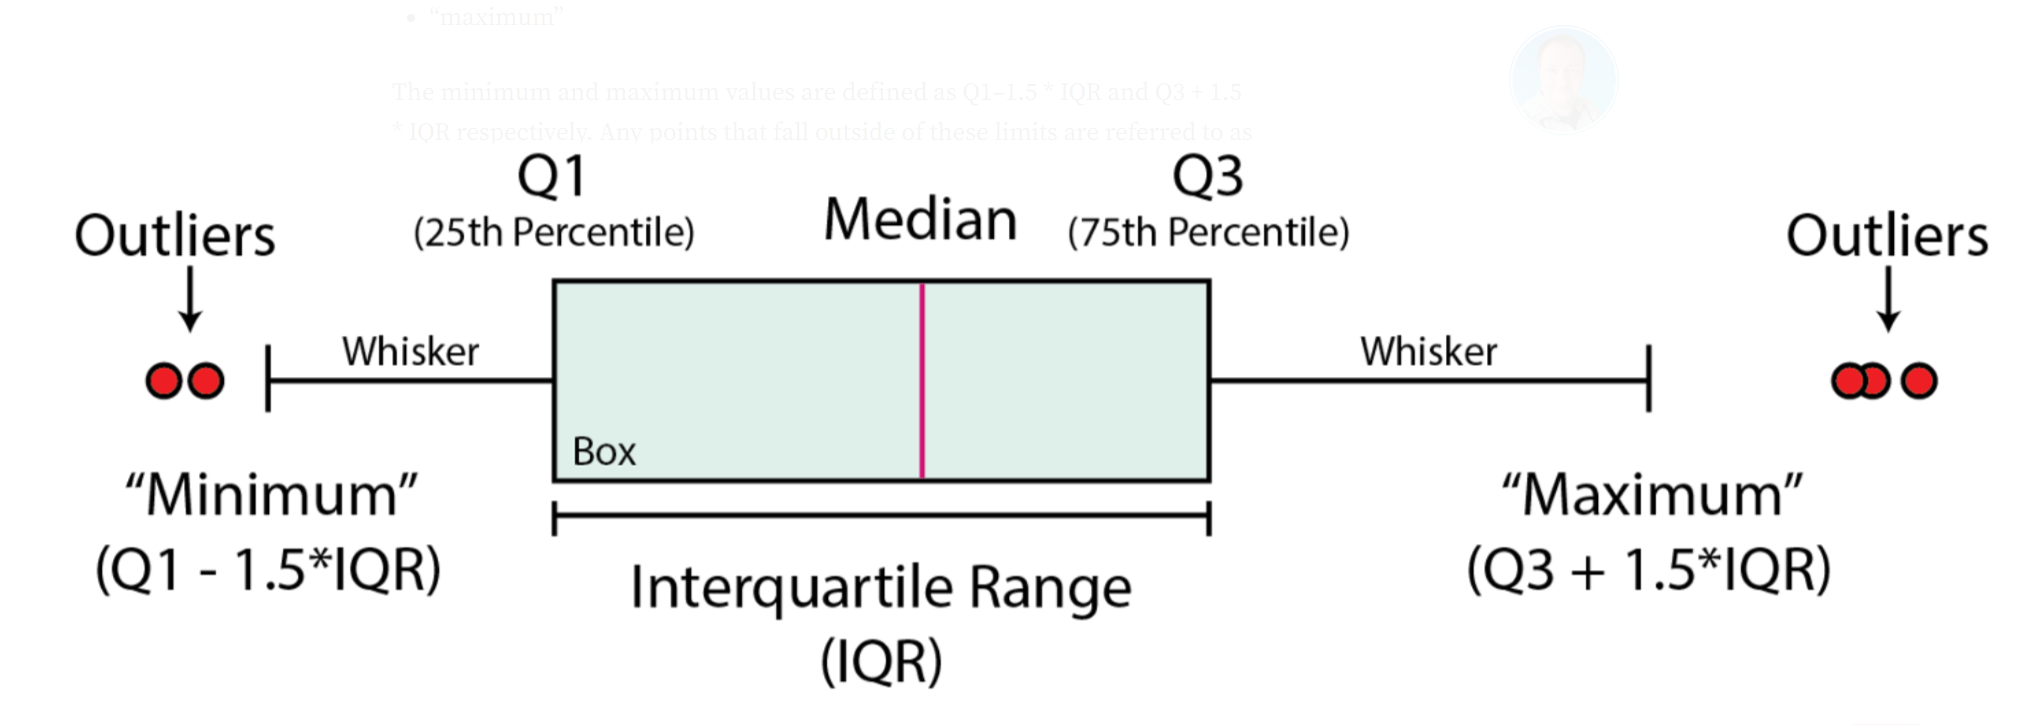


Reference:

https://towardsdatascience.com/creating-boxplots-with-the-seaborn-python-library-f0c20f09bd57

https://towardsdatascience.com/best-seaborn-visualizations-for-data-science-3d866f99c3a9

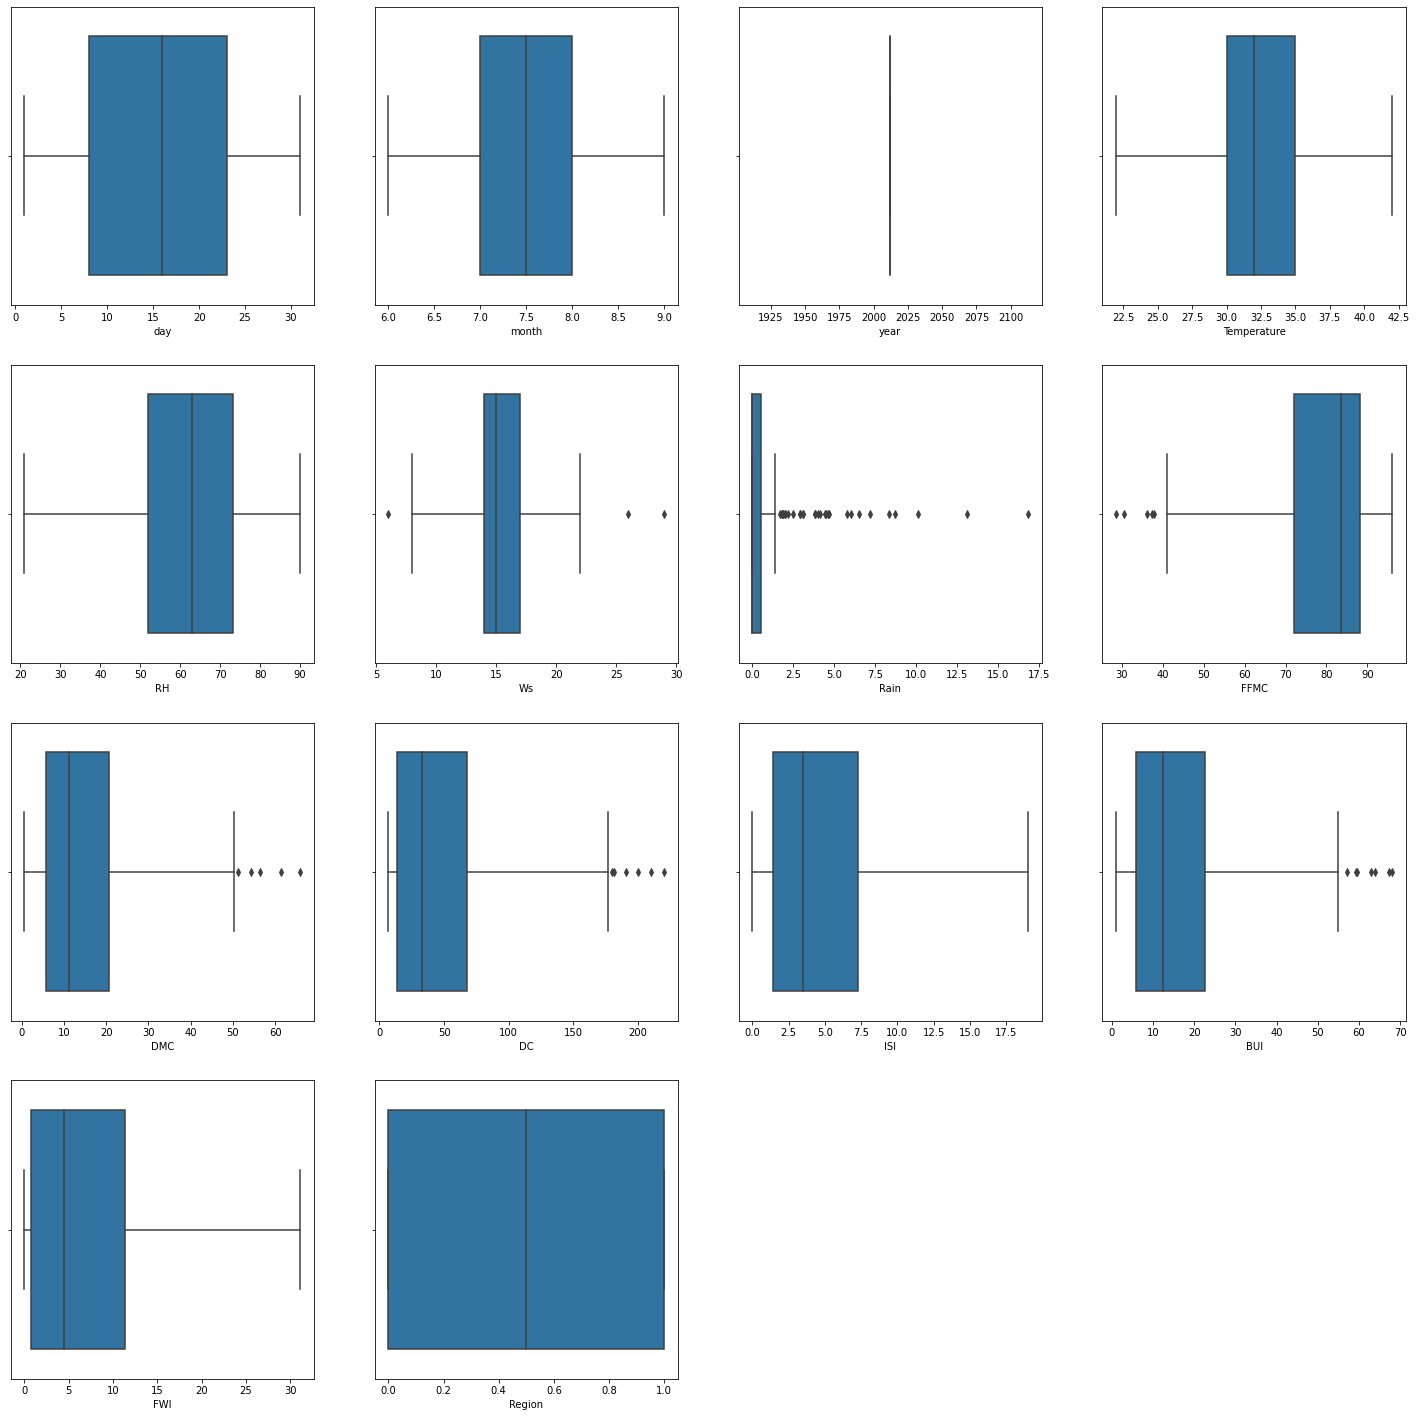

In [65]:
plt.figure(figsize=(25,45))
for i in range(len(num_col)):
    plt.subplot(7,4, i+1)
    sns.boxplot(x=df[num_col[i]], data=df, whis=2, hue="Classes")
    plt.xlabel(num_col[i])

Observation: 

    Outlier: DMC, DC, BUI, Ws, Rain, FFMC  
    No Outlier: day, month, year, Tempature, FWI, Region, RH

## Violin Plot

Violin plots are a method of plotting numeric data and can be considered a combination of the box plot with a kernel density plot. In the violin plot, we can find the same information as in the box plots:

1. Median (the white dot in the middle, you’ll see it later)
2. Interquartile Range (IQR, the thick black bar surrounding the white dot)
3. Lower/Upper Values (lines extending from the thick black bar, defined as Q1–1.5 IQR and Q3 + 1.5 IQR — useful for outlier detection)

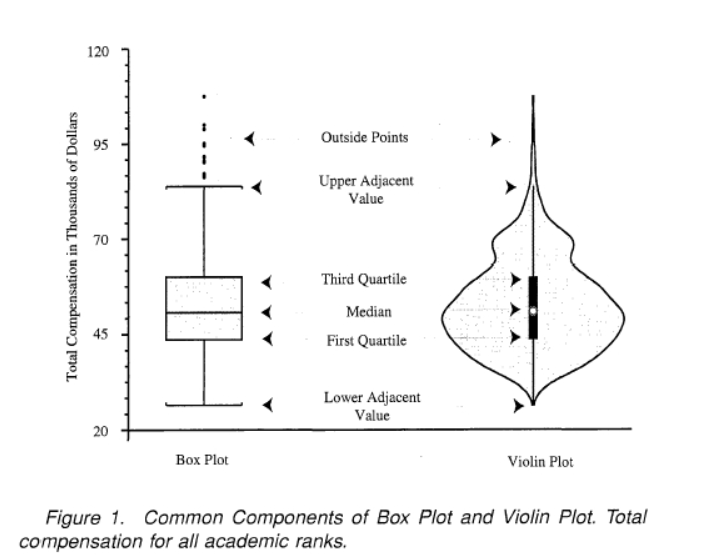

Reference:
https://towardsdatascience.com/violin-plots-explained-fb1d115e023d

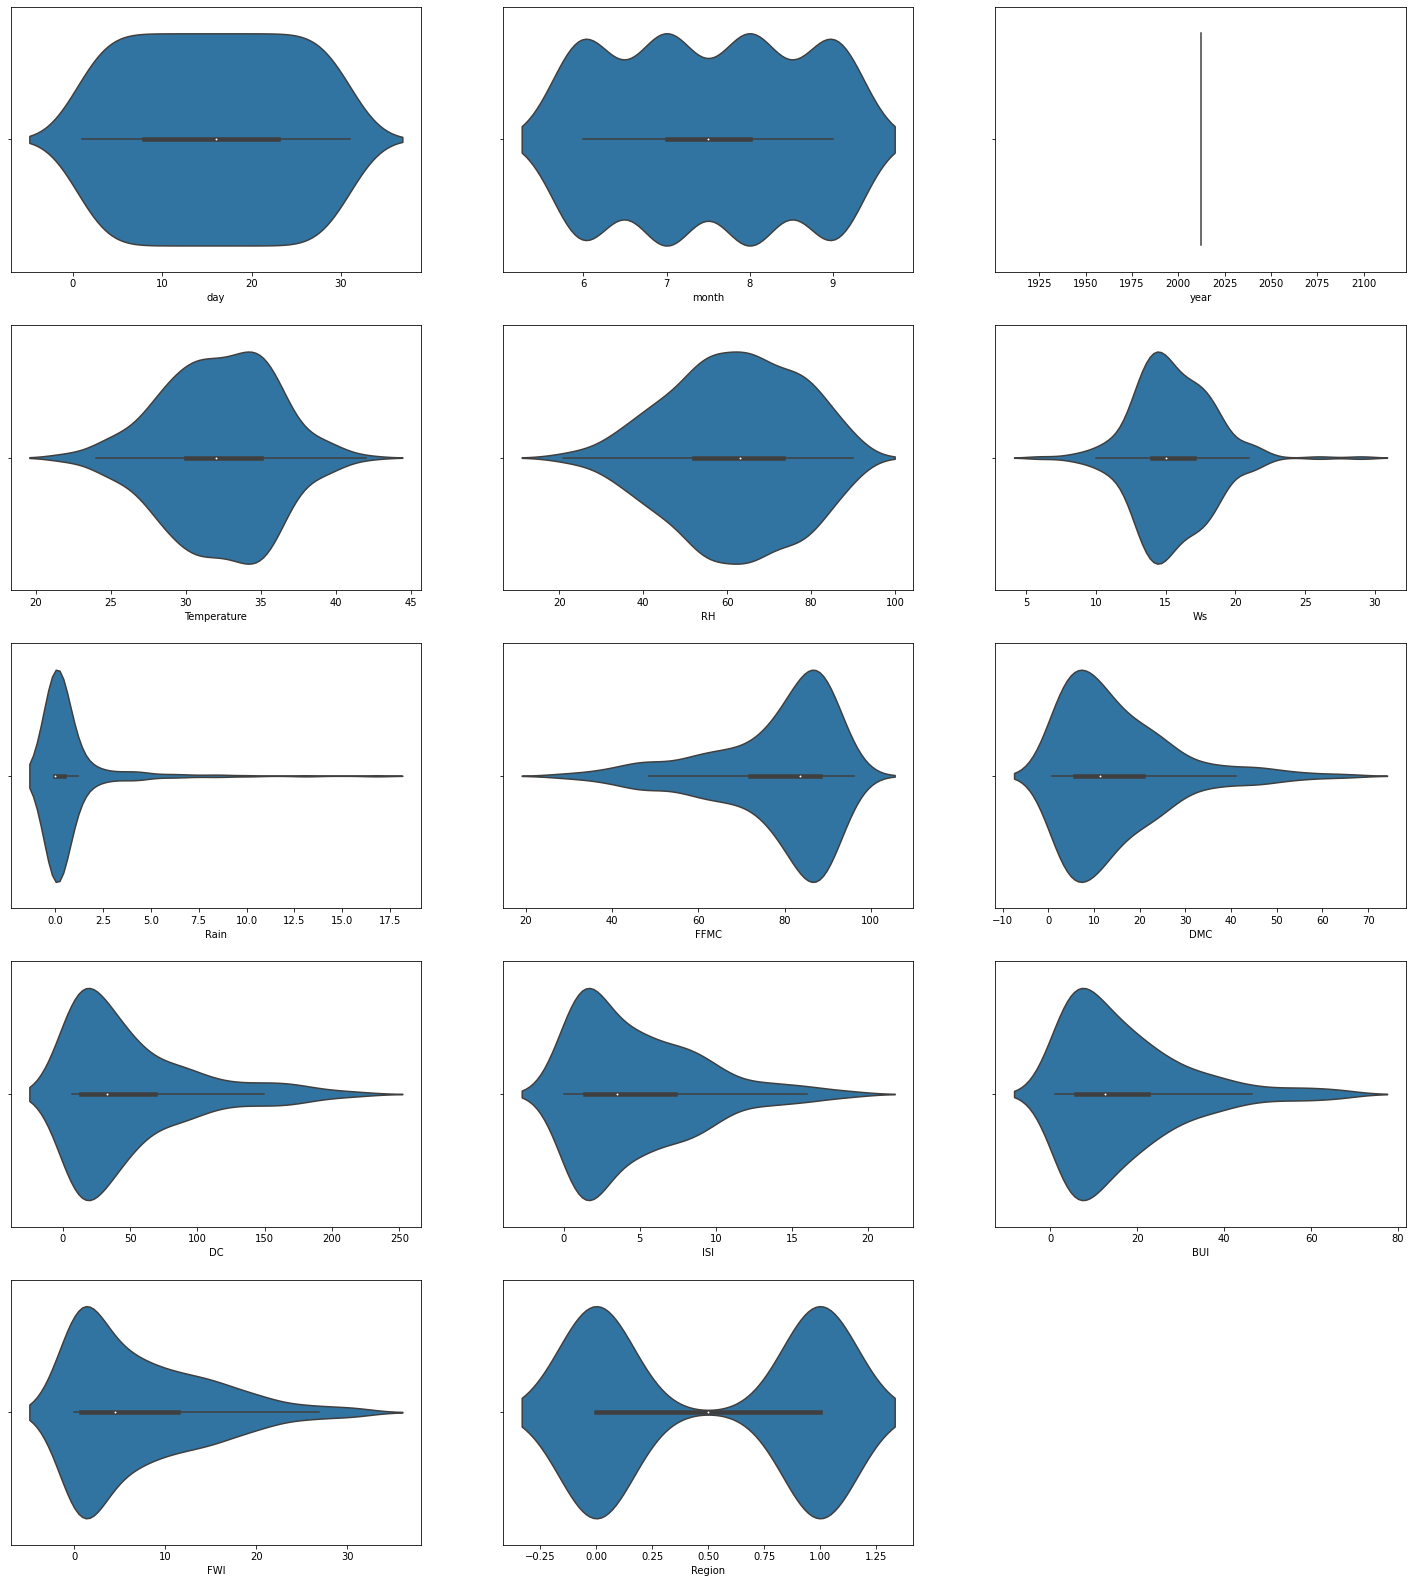

In [66]:
plt.figure(figsize=(25,40))
for i in range(len(num_col)):
    plt.subplot(7,3, i+1)
    sns.violinplot(x=df[num_col[i]], data=df)
    plt.xlabel(num_col[i])

## Strip Plot

A strip plot implements a scatter plot to show the spread of individual observations for a feature.

Dense locations indicate areas with many overlapping points, and you can quickly spot outliers. It’s however hard to establish the relative center unlike a box plot


#### Strip plot on rain

<AxesSubplot:xlabel='Rain'>

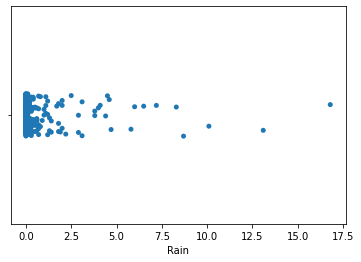

In [67]:
sns.stripplot(x=df["Rain"], data=df, hue="Classes")

Observation: Rain is high in between 0 to 5, rain is low in between 5 to 17.5

#### Strip Plot on FFMC

<AxesSubplot:xlabel='FFMC'>

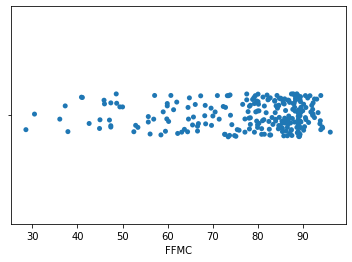

In [68]:
sns.stripplot(x=df["FFMC"], data=df)

Observation: FFMC is high in between 70 to 90, FFMC is low on between 30 to 70

#### Strip Plot on Temperature

<AxesSubplot:xlabel='Temperature'>

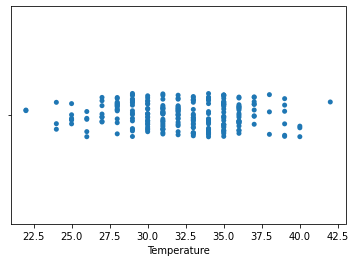

In [69]:
sns.stripplot(x=df["Temperature"], data=df)

observation: 1.see plot most of temperature is in between 27 to 40 2.less in between 22 to 27 and 40 to 42.5

## Visualizing Categorical Variables

In [70]:
# Categorial Column
cat_col

['Classes']

#### Bar Chart

Bar Plot
A bar plot or bar graph is a plot/graph that represents the value of categorical data with rectangle bars. 

The rectangle bars can be horizontal or vertical. Categorical data here can be the name of the movies, countries, football players, etc. Correspondingly the values can be the count of the movies that won Oscar, GDP of a country, players who scored most goals, etc.

##### Bar Chart on Classes

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

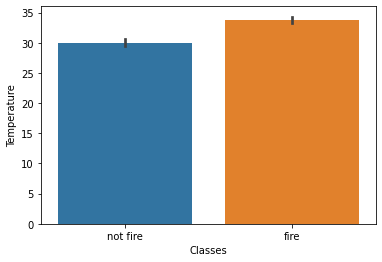

In [71]:
sns.barplot(x="Classes",y="Temperature",data=df)

Observation: Temperature is high then fire is their, when temperature is low then not fire

#### Pie Chart

When to use:

    When you show relative proportions and percentages of a whole dataset. 
    Best used with small datasets — also applies to donut charts.
    When comparing the effect of ONE factor on different categories.
    If you have up to 6 categories.
    When your data is nomial and not ordinal.

##### Pie Chart on Classes

([<matplotlib.patches.Wedge at 0x24743412100>,
 [Text(-0.22500720993803214, 1.0767412667284106, 'Fire'),
  Text(0.2250071091262376, -1.0767412877951015, 'Not Fire')],
 [Text(-0.12273120542074478, 0.5873134182154967, '56.56%'),
  Text(0.12273115043249322, -0.5873134297064189, '43.44%')])

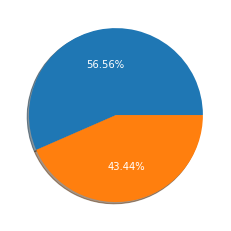

In [72]:
plt.pie(df["Classes"].value_counts(), labels=["Fire", "Not Fire"], shadow=True,autopct="%1.2f%%", textprops={'color':"w"})

Observation: Fire percentage is more then not fire

## CountPlot

    Count Plot is an example of a categorical estimate plot.
    It shows the estimated counts of observations in each categorical bin using bars.
    We can also set the hue to see the counts of the observations relative to the target variable.

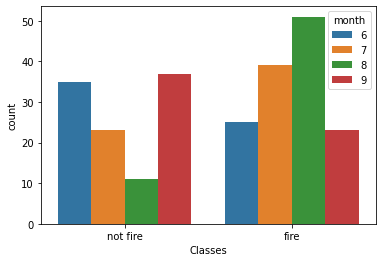

In [73]:
# plt.figure(figsize=(15,15))
for i in range(len(cat_col)):
    # plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat_col[i]], data=df, hue="month")
    plt.xlabel(cat_col[i])

Observation: 8 month have more fire count and less not fire count

## Bivariate Analysis

Bivariate analysis means the analysis of bivariate data. It is one of the simplest forms of statistical analysis, used to find out if there is a relationship between two sets of values. It usually involves the variables X and Y.

    Univariate analysis is the analysis of one (“uni”) variable.
    Bivariate analysis is the analysis of exactly two variables.
    Multivariate analysis is the analysis of more than two variables.
    
Types of Bivariate Analysis:

    Common types of bivariate analysis include:

1. Scatter plots,
2. Regression Analysis: 
    Regression analysis is a catch all term for a wide variety of tools that you can use to determine how your data points might be related. In the image above, the points look like they could follow an exponential curve (as opposed to a straight line). Regression analysis can give you the equation for that curve or line. It can also give you the correlation coefficient.

3. Correlation Coefficients:
Calculating values for correlation coefficients are usually performed on a computer, although you can find the steps to find the correlation coefficient by hand here. This coefficient tells you if the variables are related. Basically, a zero means they aren’t correlated (i.e. related in some way), while a 1 (either positive or negative) means that the variables are perfectly correlated (i.e. they are perfectly in sync with each other).


The kind of bivariate analysis is dependent on the kind of attributes and variables that is used to analyze the data. The variables may be ordinal, categorical, or numeric. The independent variable is categorical like a brand of a pen. In this case, probit regression or logit regression is used. If the dependent and the independent variables are both ordinal which means that they have a ranking or position then the rank correlation coefficient is measured.

In case the dependent attribute is ordinal then the ordered probit or the ordered logit is used. It is possible that the dependent attribute could be internal or a ratio like the scale of temperature. This is where regression is measured. Here is how we mention the kinds of bivariate data correlation.

1. Numerical and Numerical
In this kind of variable both the variables of the bivariate data which includes the dependent and the independent variable have a numerical value.

2. Categorical and Categorical 
When both the variables in the bivariate data are in the static form then the data is interpreted and statements and predictions are made about it. During the research, the analysis will help to determine the cause and impact to conclude that the given variable is categorical.

3. Numerical and Categorical
This is when one of the variables is numerical and the other is categorical.

Bivariate analysis is a kind of statistical analysis when two variables are observed against each other. One of the variables will be dependent and the other is independent. The variables are denoted by X and Y. The changes are analyzed between the two variables to understand to what extent the change has occurred.


#### Barplot

It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

##### Barplot on Rain vs classes

<AxesSubplot:xlabel='Classes', ylabel='Rain'>

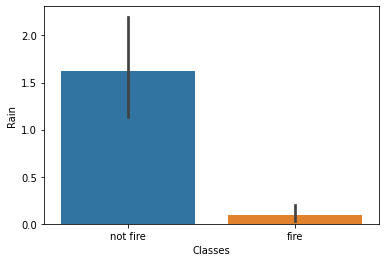

In [74]:
sns.barplot(x="Classes",y="Rain",data=df)

Observation:
    When Rain is high then not fire, when rain is less then fire is low

#### Barplot on Classes vs region

<AxesSubplot:xlabel='Classes', ylabel='Region'>

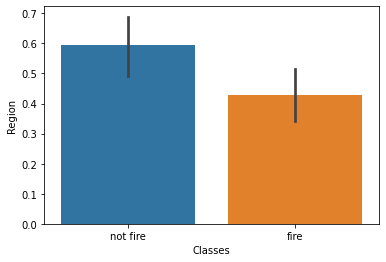

In [75]:
sns.barplot(x="Classes",y="Region", data=df)

## Multivariate Analysis
 

#### Pair Plot
pair plot shows a clear and nice view of all variables and their relation ship with all other variables.

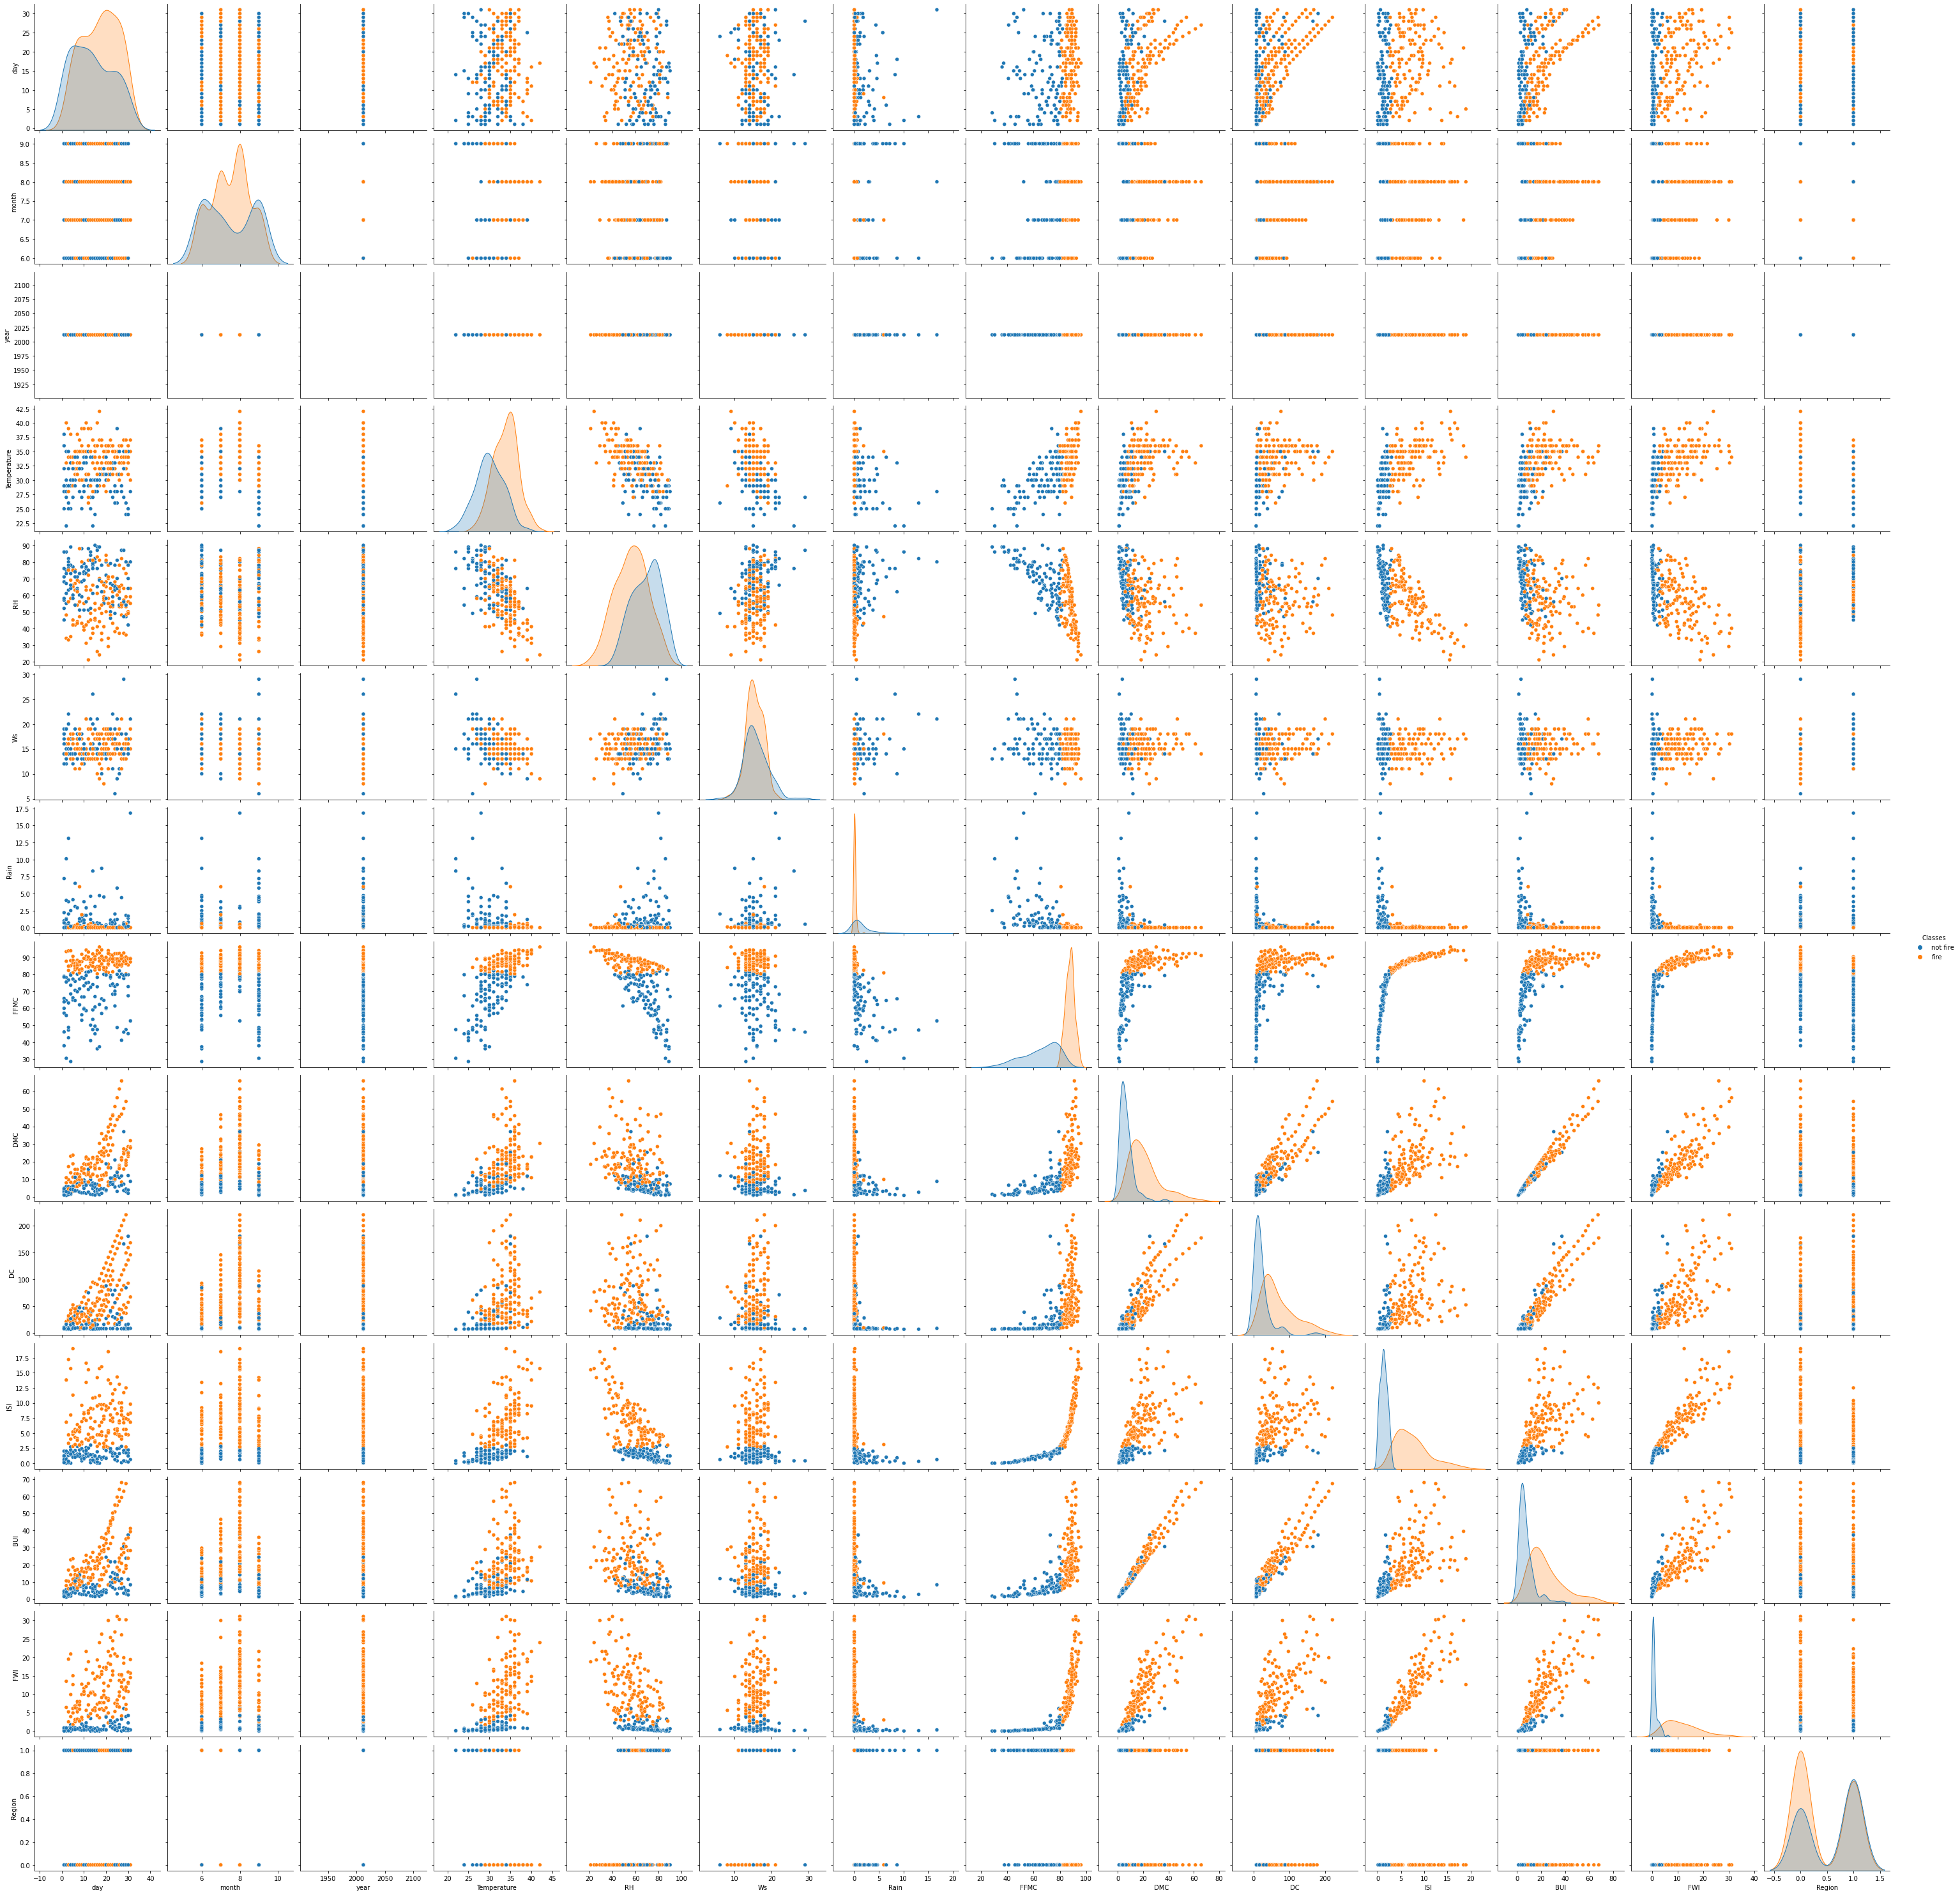

In [76]:
sns.pairplot(df,hue="Classes", size=3)

In [77]:
### Check Multicollinearity in Numerical features

In [78]:
df[num_col].corr()

day         month  year  Temperature        RH  \
day          1.000000e+00  2.232788e-17   NaN     0.095772 -0.074209   
month        2.232788e-17  1.000000e+00   NaN    -0.059017 -0.037884   
year                  NaN           NaN   NaN          NaN       NaN   
Temperature  9.577222e-02 -5.901677e-02   NaN     1.000000 -0.654443   
RH          -7.420934e-02 -3.788419e-02   NaN    -0.654443  1.000000   
Ws           4.700086e-02 -4.144673e-02   NaN    -0.278132  0.236084   
Rain        -1.122654e-01  3.532207e-02   NaN    -0.326786  0.222968   
FFMC         2.240321e-01  1.557668e-02   NaN     0.677491 -0.645658   
DMC          4.915710e-01  6.817778e-02   NaN     0.483105 -0.405133   
DC           5.279285e-01  1.276719e-01   NaN     0.370498 -0.220330   
ISI          1.793008e-01  6.354476e-02   NaN     0.605971 -0.688268   
BUI          5.172239e-01  8.556743e-02   NaN     0.456415 -0.349685   
FWI          3.502343e-01  8.173226e-02   NaN     0.566839 -0.580457   
Region      -4.662229e-16  6.718556e-17   NaN    -0.273496  0.406424   

                   Ws      Rain      FFMC       DMC        DC       ISI  \
day          0.047001 -0.112265  0.224032  0.491571  0.527929  0.179301   
month       -0.041447  0.035322  0.015577  0.068178  0.127672  0.063545   
year              NaN       NaN       NaN       NaN       NaN       NaN   
Temperature -0.278132 -0.326786  0.677491  0.483105  0.370498  0.605971   
RH           0.236084  0.222968 -0.645658 -0.405133 -0.220330 -0.688268   
Ws           1.000000  0.170169 -0.163255 -0.001246  0.076245  0.012245   
Rain         0.170169  1.000000 -0.544045 -0.288548 -0.296804 -0.347862   
FFMC        -0.163255 -0.544045  1.000000  0.602391  0.503910  0.740751   
DMC         -0.001246 -0.288548  0.602391  1.000000  0.875358  0.678355   
DC           0.076245 -0.296804  0.503910  0.875358  1.000000  0.503919   
ISI          0.012245 -0.347862  0.740751  0.678355  0.503919  1.000000   
BUI          0.030303 -0.299409  0.590251  0.982206  0.941672  0.641351   
FWI          0.033957 -0.324755  0.691430  0.875191  0.737041  0.922422   
Region       0.176829  0.041080 -0.224680 -0.191094  0.081489 -0.266298   

                  BUI       FWI        Region  
day          0.517224  0.350234 -4.662229e-16  
month        0.085567  0.081732  6.718556e-17  
year              NaN       NaN           NaN  
Temperature  0.456415  0.566839 -2.734961e-01  
RH          -0.349685 -0.580457  4.064239e-01  
Ws           0.030303  0.033957  1.768290e-01  
Rain        -0.299409 -0.324755  4.108006e-02  
FFMC         0.590251  0.691430 -2.246798e-01  
DMC          0.982206  0.875191 -1.910937e-01  
DC           0.941672  0.737041  8.148947e-02  
ISI          0.641351  0.922422 -2.662977e-01  
BUI          1.000000  0.856912 -8.799645e-02  
FWI          0.856912  1.000000 -1.984738e-01  
Region      -0.087996 -0.198474  1.000000e+00

### Check Multicollinearity in Numerical features

<AxesSubplot:>

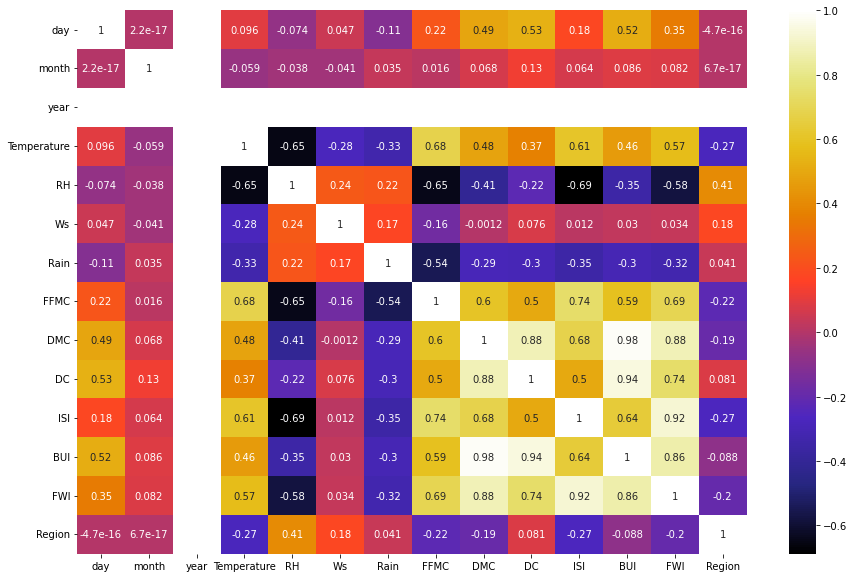

In [79]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap="CMRmap", annot=True)

### Outlier treatment
We had observed outliers in the following columns:

    FFMC
    ISI
    rain

In [80]:
out_col = ["FFMC", "ISI", "Rain"]

However, the above outliers are not error values so we cannot remove it.

In order to minimize the effect of outliers in our model we will transform the above features.

## Linear Regression
In this kernel we will be working on Linear regression using both Statistical and Machine learning approach

Difference between statistical and machine learning approach

Machine learning produces predictions. As far as I can tell, it is not very good at drawing conclusions about general principles based on a set of observations.
Statistical estimation lets the practitioner make inferences (conclusions about a larger set of phenomena based on the observation of a smaller set of phenomena.) For example, in a regression model the practitioner can estimate the effect of a one unit change in an independent variable X on a dependent variable y.


### Statistical approach
Checking assumptions for linear regression in statistics
1. Linearity of model
2. mality of residuals
3. Homoscedasticity
4. No Autocorrelation
5. Multicollinearity